In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'TeX Gyre Heros'
from matplotlib.animation import FuncAnimation

from numba import njit
from scipy.optimize import curve_fit
import os


In [153]:

bacteria_data = np.loadtxt('/media/janne/Transcend/bacteria/apoptotic_cells/all_time_x_y.dat')
ids=np.loadtxt('/media/janne/Transcend/bacteria/apoptotic_cells/apoptotic_cells_bact_id.dat',usecols=0)
n_bact=len(ids)
ids_occ=bacteria_data[:,0]


In [ ]:
for id in ids:
    
    pos = np.where(ids_occ==id)[0]
    p0=pos[0]
    pf=pos[len(pos)-1] +1
    print(f'bacterium id {int(id)} \n p0={p0}, pf={pf}')
    x_plot=bacteria_data[:,2]
    x_plot=x_plot[p0:pf]
    y_plot=bacteria_data[:,3]
    y_plot=y_plot[p0:pf]
    time=bacteria_data[:,1][p0:pf]
    t_total=len(time)
    time_steps=np.arange(t_total)
    
    # with open('bacteria_frames.dat', 'a') as lala:
    #     lala.write(f'{t} {t_total+1}\n')
    np.savetxt(f'/media/janne/Transcend/bacteria/apoptotic_cells/time_x_y/time_x_y_id_{id :g}.dat', np.c_[time,x_plot,y_plot], fmt='%.3f')

In [ ]:
# vx=np.zeros(t_total)
# vy=np.zeros(t_total)
# time_v=np.zeros(t_total)
all_mag_v=[]
all_mag_time=[]

ids=np.loadtxt('/media/janne/Transcend/bacteria/55_tracks_data/55_tracks_id.dat',usecols=0)

for id in ids:
    file= f'/media/janne/Transcend/bacteria/55_tracks_data/time_x_y_id/time_x_y_id_{int(id)}.dat'
    data=np.loadtxt(file)
    time=data[:,0]
    x_plot=data[:,1]
    y_plot=data[:,2]
    print(f'id = {id}\n')
    
    for i in range(len(x_plot) -1):
        dt = time[i+1] -time[i]
        # print(f'dt={dt}, pos = {i}')
        # if dt==0.0:
        #     vx=(x_plot[i+1] - x_plot[i])/3.335
        #     vy=(y_plot[i+1] - y_plot[i])/3.335
        # else:
        vx =(x_plot[i+1] - x_plot[i])/dt
        vy =(y_plot[i+1] - y_plot[i])/dt
        mag_v=np.sqrt(vx*vx + vy*vy)
        mag_v_name=f'/media/janne/Transcend/bacteria/55_tracks_data/velocities_fixed/mag_v_time_bact_id_{int(id)}.dat'
        with open(mag_v_name, 'a') as lala:
            lala.write(f'{time[i+1]: .5f} {mag_v :.5f} {vx :.5f} {vy:.5f}\n')
        all_mag_v.append(mag_v)
        all_mag_time.append(time[i+1])
    #     if mag_v > 3:
    #         print(f'in id ={id}')
    # print('\n ----------------------- \n')

    

np.savetxt('/media/janne/Transcend/bacteria/55_tracks_data/all_mag_v_55_tracks_fixed.dat', np.c_[all_mag_time,all_mag_v])

# print('vx=',vx)
# print('vy=',vy)


# vx=vx[:-1]
# vy=vy[:-1]
# time_v=time_v[:-1]

# mag_v=np.sqrt(vx*vx + vy*vy)


In [ ]:
for id in ids:
    file= f'/media/janne/Transcend/bacteria/55_tracks_data/time_x_y_id/time_x_y_id_{int(id)}.dat'
    data=np.loadtxt(file)
    time=data[:,0]
    x_plot=data[:,1]
    y_plot=data[:,2]
    msd=0
    for i in range(len(x_plot)):
        dx=x_plot[i]-x_plot[0]
        dy=y_plot[i]-y_plot[0]
        msd=dx*dx + dy*dy
        # msd=msd*msd
        lsd_name=f'/media/janne/Transcend/bacteria/55_tracks_data/msd_fixed/msd_time_55_tracks_id_{int(id)}.dat'
        with open(lsd_name, 'a') as lala:
            lala.write(f'{time[i]} {msd}\n')

In [ ]:
def MSD_calculator(time,x_plot,y_plot,save_file_name):
    msd=0
    for i in range(len(x_plot)):
        dx=x_plot[i]-x_plot[0]
        dy=y_plot[i]-y_plot[0]
        msd=dx*dx + dy*dy
        # msd=msd*msd
        with open(save_file_name, 'a') as lala:
            lala.write(f'{time[i]} {msd}\n')
    return 'done'


In [ ]:
fig, ax=plt.subplots(figsize=(8,7),dpi=100)
id = 817


data,bins=np.histogram(all_mag_v,bins=200)

binscenters=0.5*(bins[1:]+bins[:-1])
# mean, var, skew, kurt = expon.stats(moments='mvsk')
# xx = expon.rvs(size=100)
# aa=expon.fit(binscenters)
# best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)
x=np.arange(0,5,0.01)
# P=expon.pdf(x)
def exp_fit(x,a,b):
    return b*np.exp(-a*x)

Exp = np.sum(binscenters*data)/np.sum(data)
popt,pcov=curve_fit(exp_fit,xdata=binscenters,ydata=data)
perr=np.sqrt(np.diag(pcov))
# plt.bar(binscenters,data,width=bins[1]-bins[0],color='red',label='tracking data')


# plt.plot(x,exp_fit(x, *popt),color='black',label=fr'exponential fit, $b\exp(ax)$' + '\n' fr'a={popt[0]: .1f} $\pm$ {perr[0]:.1f}' + '\n' + fr'b={popt[1]: .1f} $\pm$ {perr[1]:.1f}')
# plt.xlim(0,0.4)


# plt.plot(bins, best_fit_line,label=f'mean={mu : .4f}, std={sigma : .4f}',lw=2)
plt.xlabel(r'$|\mathbf{v}|$ ($\mu m/s$)',fontsize=18)
plt.ylabel(r'$P(|\mathbf{v}|$) (distribution)',fontsize=18)
plt.tick_params(axis='both', labelsize=18)
# plt.xticks(np.arange(0,0.9,0.1))
# plt.semilogy()
plt.legend(fontsize=18)
# plt.savefig(f'')
# plt.show()

# fig1,ax1=plt.subplots(figsize=(8,7))

plt.bar(binscenters,data,width=bins[1]-bins[0],color='red',label=f'tracking data, avg = {Exp :.3f}')
# plt.bar(binscenters_1,data_1,width=bins_1[1]-bins_1[0],color='blue',label=f'tracking data, id {id}')
# plt.plot(x,exp_fit(x, *popt)/3000,color='black',label=fr'exponential fit, $b\exp(ax)$' + '\n' fr'a={popt[0]: .1f} $\pm$ {perr[0]:.1f}' + '\n' + fr'b={popt[1]: .1f} $\pm$ {perr[1]:.1f}')

plt.legend(fontsize=18)
plt.tick_params(axis='both', labelsize=18)
plt.xlabel(r'$|\mathbf{v}|$ ($\mu m/s$)',fontsize=18)
plt.ylabel(r'$P(|\mathbf{v}|$) (distribution)',fontsize=18)
plt.ylim(0,max(data))
# plt.xlim(-0.07228946449074058,0.4611884823206738)

plt.show()

In [ ]:
fig, ax=plt.subplots(figsize=(12,7))
id=723
data_mag=np.loadtxt(f'/media/janne/Transcend/bacteria/150_frames/velocities_corrected/mag_v_time_bact_id_723.dat')
time_v_plot=data_mag[:,0]
mag_v_plot=data_mag[:,1]
ax.plot(time_v_plot,mag_v_plot,label=f'id {id}',marker='o')
ax.set_xlabel('time (s)',fontsize=18)
ax.set_ylabel(r'$|\mathbf{v}|$ ($\mu m/s$)',fontsize=18)
ax.legend(fontsize=19)
ax.tick_params(axis='both', labelsize=18)

plt.show()


In [ ]:
X_all=[]
Y_all=[]
time_all=[]
for id in ids:
    file= f'/home/janne/bacteria/150_frames/x_y_time_bact_id_{int(id)}.dat'
    data=np.loadtxt(file)
    time=data[:,0]
    x_plot=data[:,1]
    y_plot=data[:,2]
    X_all.append(x_plot)
    Y_all.append(y_plot)
    time_all.append(time)

# Movie trajectories

In [ ]:
from matplotlib.animation import FuncAnimation
fig_movie, ax_movie = plt.subplots(figsize=(12,7))  
import os 

import glob
ids = np.loadtxt('/media/janne/Transcend/bacteria/55_tracks_data/55_tracks_id.dat')

file_list = glob.glob('/media/janne/Transcend/bacteria/55_tracks_data/time_x_y_id/*.dat')
file_list = sorted(file_list, key=lambda x: int(x.split('_id_')[-1].split('.')[0]))

data = [np.loadtxt(file)[:,2] for file in file_list]
x=[np.loadtxt(file)[:,1] for file in file_list]

data_copy = data
x_copy = x
pairs = [(list(), list()) for _ in range(len(file_list))]
x1, y1 = zip(*pairs)




# colormap = plt.cm.nipy_spectral #I suggest to use nipy_spectral, Set1,Paired
# colors = colormap(np.linspace(0, 1, len(x)))

def animate(i):
    frame_index = i
    
    ax_movie.clear()
    output_folder = f'/media/janne/Transcend/bacteria/55_tracks_data/time_x_y_id/movies/frames_55_tracks_fixed2'
  
    os.makedirs(output_folder, exist_ok=True)

    # Arr1=X_all_bac[i]
    # Arr2=Y_all_bac[i]
    # X_all[0][i]
    # Y_all[0][i]
    
    # ax_movie.set_prop_cycle('color', colors)
    for r in range(len(data)):
        # print(r,len(x[r]))
        if frame_index < len(x[r]):
            x1[r].append(x[r][frame_index])
            y1[r].append(data[r][frame_index])
            
            
        #     x_copy.pop(r)
        #     data_copy.pop(r)
        #     print(f'index = {frame_index},max size={len(x[r])}')
            

        #     # x1[r].append(x[r][frame_index])
        #     # y1[r].append(data[r][frame_index])
        # else:
        #     x1[r].append(x_copy[r][frame_index])
        #     y1[r].append(data_copy[r][frame_index])

        

        ax_movie.plot(x1[r],y1[r],marker='o', ms=5, mfc='none', lw=1.3,mew=1.2)
        ax_movie.annotate(f'id {int(ids[r])}',xy=(x1[r][-1],y1[r][-1]))
        
    # ax.plot(x2,y2,marker='o')
    # ax.plot(x3,y3,marker='o')
    # ax.plot(x4,y4,marker='o')
    # ax.plot(x5,y5,marker='o')
    # ax.plot(x5,y6,marker='o')
        # plt.plot(x,y)
    
    ax_movie.set_xlabel(r'x ($\mu$m)',fontsize=18)
    ax_movie.set_ylabel(r'y ($\mu$m)',fontsize=18)
        # ax.set_title(f'time={time[i]}',fontsize=15)
        # ax.set_xlim(min(x)-1,max(x)+1)
        # ax.set_ylim(min(y)-1,max(y)+1)
    ax_movie.tick_params(axis='both', labelsize=15)

    
    # print(frame_index)


    frame_filename = f'/media/janne/Transcend/bacteria/55_tracks_data/time_x_y_id/movies/frames_55_tracks_fixed2/frame_{frame_index:03d}'
    plt.savefig(frame_filename, dpi=300)
    

ani = FuncAnimation(fig_movie,animate, frames=149, interval=40, repeat=False)
plt.show()
# plt.tight_layout()
# plt.show()
# ani.save('/home/janne/1d_CM/attractive/N_scaling_small/XY_N_100_L_100_R_1_V_1_g_1.1_e_1.1_T_1000000_Dt_0.05_h_1_k_2.5.gif', writer=PillowWriter(fps=10), dpi=300)
# plt.close(fig)


In [ ]:
file_list = glob.glob('/media/janne/Transcend/bacteria/55_tracks_data/time_x_y_id/*.dat')
file_list = sorted(file_list, key=lambda x: int(x.split('_id_')[-1].split('.')[0]))


In [ ]:
def detect_plateaus(x_values, y_values, threshold, min_points, tolerance):
    plateaus = []
    current_plateau = []

    for i in range(len(x_values)):
        if not current_plateau or abs(y_values[i] - y_values[current_plateau[-1]]) <= threshold:
            current_plateau.append(i)
        else:
            if len(current_plateau) >= min_points:
                # Check if the segment is relatively flat
                segment_y_values = y_values[current_plateau]
                if np.ptp(segment_y_values) <= tolerance:
                    plateaus.append(current_plateau)
            current_plateau = [i]

    if len(current_plateau) >= min_points:
        # Check the last segment as well
        segment_y_values = y_values[current_plateau]
        if np.ptp(segment_y_values) <= tolerance:
            plateaus.append(current_plateau)

    return plateaus

def calculate_plateau_sizes(x_values, plateaus):
    plateau_sizes = [x_values[plateau[-1]] - x_values[plateau[0]] for plateau in plateaus]
    return plateau_sizes

def analyze_plateaus(filename, threshold=0.1, min_points=4, tolerance=0.05):
    data = np.loadtxt(filename)

    x_values = data[:,0]
    y_values = data[:,1]

    # Detect plateaus
    plateaus = detect_plateaus(x_values, y_values, threshold, min_points, tolerance)

    # Calculate plateau sizes in terms of x-axis
    plateau_sizes = calculate_plateau_sizes(x_values, plateaus)

    # Print or visualize the results
    print("Plateau sizes (in terms of x-axis):", plateau_sizes)

    # Visualize the plateaus on a plot with connecting lines
    plt.plot(x_values, y_values, label="Original Data")
    for plateau in plateaus:
        plt.plot(x_values[plateau], y_values[plateau], label="Plateau", linestyle='-', marker='o')
        plt.plot([x_values[plateau[0]], x_values[plateau[-1]]], [y_values[plateau[0]], y_values[plateau[-1]]], linestyle='--', color='gray')

    plt.legend()
    plt.show()



In [ ]:

def detect_plateaus(x_values, y_values, threshold, min_points):
    plateaus = []
    current_plateau = []

    for i in range(len(x_values)):
        if not current_plateau or abs(y_values[i] - y_values[current_plateau[-1]]) <= threshold:
            current_plateau.append(i)
        else:
            if len(current_plateau) > min_points:
                plateaus.append(current_plateau)
            current_plateau = [i]

    if len(current_plateau) >= min_points:
        plateaus.append(current_plateau)

    return plateaus

def calculate_plateau_sizes(x_values, y_values,plateaus,plateau_diff,avg_plateau_th):

    plateaus_save = plateaus
    
    y_plat_avg = [np.average(y_values[plateau]) for plateau in plateaus]

    for p in range(len(plateaus)):

        avg_plateau = y_plat_avg[p]
        for point in y_values[plateaus[p]]:
            
            if abs(point - avg_plateau) > avg_plateau_th:
                loc = np.where(y_values[plateaus[p]] == point)
                
                index = loc[0][0]
                plateaus_save[p].pop(index)

    plateau_avg = [np.average(y_values[plateau]) for plateau in plateaus_save]

    for i in range(len(plateau_avg)-1): 
        if abs(plateau_avg[i] - plateau_avg[i+1]) < plateau_diff:

           if len(plateaus_save) == i+1:
                break
           else:
                plateaus_save[i]+=plateaus_save[i+1]
                plateaus_save.pop(i+1)
            
    # plateaus_save = [sublist for sublist in plateaus_save if len(sublist) > 2]
    # print(plateaus_save)

    # for l in range(len(plateaus_save)):
    #     if len(plateaus_save[l]) < 3:
    #         print(l)
    #         plateaus_save.pop(l)

    # plateaus_save5 = [len(x) for x in plateaus_save]
    plateaus_save6 = []
    for f in plateaus_save:
        if len(f) > 3:
            plateaus_save6.append(f)
    
    # for j in range(len(plateaus_save)):
    #     print(j,len(plateaus_save[j]))
    #     plateau = plateaus_save[j]
    #     deriv_aux = (y_values[plateau[-1]] - y_values[plateau[0]])/(x_values[plateau[-1]] - x_values[plateau[0]])
    #     if deriv_aux > 1e-03 or len(plateau) == 1:
    #         plateaus_save.pop(j)

    plateau_sizes = [x_values[plateau[-1]] - x_values[plateau[0]] for plateau in plateaus_save6]
    plateau_avg2 = [np.average(y_values[plateau]) for plateau in plateaus_save6]

    # print(f'plateaus avgs = {plateau_avg2}')
    return plateau_sizes,plateaus_save6

def analyze_plateaus(id, plateau_diff,avg_plateau_th,threshold, min_points):

   
    
    filename = f'/media/janne/Transcend/bacteria/55_tracks_data/msd/msd_time_55_tracks_id_{id}.dat'
    data = np.loadtxt(filename)

    x_values = data[:,0]
    y_values = data[:,1]
    total_number_points = len(x_values)

    # Detect plateaus
    plateaus1 = detect_plateaus(x_values, y_values, threshold, min_points)

    # Calculate plateau sizes in terms of x-axis
    plateau_sizes_both = calculate_plateau_sizes(x_values, y_values,plateaus1,plateau_diff,avg_plateau_th)
    plateau_sizes = plateau_sizes_both[0]
    plateaus =plateau_sizes_both[1]
    

    # Print or visualize the results
    print(f"Plateau sizes (in terms of x-axis): {plateau_sizes} \n")
    # print('Plateaus', plateaus)

    # fig,ax = plt.subplots(figsize=(8,6))

    # # Visualize the plateaus on a plot with connecting lines
    # ax.plot(x_values, y_values, label="Original Data", marker='s', ms=8,lw=0,mfc='none')
    # for k in range(len(plateaus)):
        
    #     plateau= plateaus[k] 
      
    #     # print(f'y_values plateaus {y_values[plateau]} \n')
    #     ax.plot(x_values[plateau], y_values[plateau], label=f"Plateau size = {plateau_sizes[k] : .2f} (s)", linestyle='-', marker='o', ms=4)
    #     ax.set_title(f'track id ={id}',fontsize=16)
    #     ax.set_xlabel('time',fontsize=16)
    #     ax.set_ylabel('MSD',fontsize=16)
    #     ax.plot([x_values[plateau[0]], x_values[plateau[-1]]], [y_values[plateau[0]], y_values[plateau[-1]]], linestyle='--', color='gray', lw=2)

    # plt.legend(fontsize=5)
    # plt.savefig(f'/media/janne/Transcend/bacteria/55_tracks_data/msd/images/msd_time_55_tracks_id_{id}_w_plateaus.pdf',dpi=200)
    # plt.show()

    return plateau_sizes,plateaus,total_number_points,x_values,y_values

In [ ]:
def slopes_calc(x,y,time,MSD,platt,all_points):


    A = np.arange(all_points)


    B = platt

    C = []
    current_sublist = []

    for elem in A:
        found = False
        for sublist in B:
            if elem in sublist:
                found = True
                break
        
        if not found:
            current_sublist.append(elem)
        else:
            if current_sublist:
                C.append(current_sublist)
                current_sublist = []

    
    if current_sublist:
        C.append(current_sublist)

    C2 = [flt for flt in C if len(flt) > 1]
    C3 = [] #slopes positions
    slopes_bt = [] #slopes values 
    for n in range(len(C2)):
        incl = C2[n]
        y_slope = y[incl]
        x_slope = x[incl]
        

        slopes = np.diff(y_slope) / np.diff(x_slope)

        if (all(s > 0 for s in slopes) or all(s < 0 for s in slopes)) == False:
            change_points = np.where(np.diff(np.sign(slopes)))[0] + 1
            
            change_points =np.insert(change_points,[0,len(change_points)],[change_points[0]-1,len(x_slope)-1])
            change_in_xy= [incl[g] for g in change_points]
            # change_in_xy.insert(0,change_in_xy[0]-1)
            # change_in_xy.insert(len(change_in_xy),change_in_xy[-1] +1)
            print(incl)
            print(change_points)
            print(change_in_xy)
            C3.append(incl[:f])
            

            for m in range(len(change_points)-1):
                f = change_in_xy[m+1]
                b = change_in_xy[m]
                dy = y[f] - y[b]
                dx = x[f] - x[b]
                slopes_bt.append(dy/dx)
                

        elif (all(s > 0 for s in slopes) or all(s < 0 for s in slopes)) == True:
            # print(incl)
            change_points = incl
            dy = y[-1] - y[0]
            dx = x[-1] - x[0]
            # print(change_points)
            C3.append(change_points)
            slopes_bt.append(dy/dx)

   
    return C3,slopes_bt,change_points,C2


In [ ]:
def slopes_calc(x,y,time,MSD,platt,all_points):


    A = np.arange(all_points)


    B = platt

    C = []
    current_sublist = []

    for elem in A:
        found = False
        for sublist in B:
            if elem in sublist:
                found = True
                break
        
        if not found:
            current_sublist.append(elem)
        else:
            if current_sublist:
                C.append(current_sublist)
                current_sublist = []

    
    if current_sublist:
        C.append(current_sublist)

    C2 = [flt for flt in C if len(flt) > 1]
    C3 = []
    slopes_bt = [] #slopes values 
    for n in range(len(C2)):
        incl = C2[n]
        y_slope = MSD[incl]
        x_slope = time[incl]
        # x=x[incl]
        # y=y[incl]
        

        slopes = np.diff(y_slope) / np.diff(x_slope)
        

        if (all(s > 0 for s in slopes) or all(s < 0 for s in slopes)) == False:
            change_points = np.where(np.diff(np.sign(slopes)))[0] + 1
            
            change_points =np.insert(change_points,[0,len(change_points)],[change_points[0]-1,len(x_slope)-1])
            change_in_xy= [incl[g] for g in change_points]
            # change_in_xy.insert(0,change_in_xy[0]-1)
            # change_in_xy.insert(len(change_in_xy),change_in_xy[-1] +1)
            # print(incl)
            # print(change_points)
            # print(change_in_xy)
            C3.append(change_in_xy)
            
            

            for m in range(len(change_points)-1):
                f = change_in_xy[m+1]
                b = change_in_xy[m]
      
                dy = MSD[f] - MSD[b]
                dx = time[f] - time[b]
                slopes_bt.append(dy/dx)
                

        elif (all(s > 0 for s in slopes) or all(s < 0 for s in slopes)) == True:

            change_points = incl
            dy = y_slope[-1] -y_slope[0]
            dx = x_slope[-1] - x_slope[0]
            # print(change_points)
            change_points =np.insert(change_points,[0,len(change_points)],[change_points[0]-1,change_points[-1]+1])
            slopes_bt.append(dy/dx)
            C3.append(change_points)

   
    return C2,slopes_bt,change_points,C3




In [ ]:
#calculate plateaus and slopes size old method
%matplotlib inline
id = 293
pos = np.loadtxt(f'/media/janne/Transcend/bacteria/55_tracks_data/time_x_y_id_{id}.dat')
# param = np.loadtxt(f'/media/janne/Transcend/bacteria/55_tracks_data/msd/images/param_id_{id}.dat')

# threshold_value =param[0]
# plateau_diff =param[1]
# avg_plateau_th =param[2]
# min_points = param[3]


threshold_value =5.7
plateau_diff =0.5
avg_plateau_th =3
min_points = 0
np.savetxt(f'/media/janne/Transcend/bacteria/55_tracks_data/msd/images/param_id_{id}.dat', np.c_[threshold_value,plateau_diff,avg_plateau_th,min_points],header='threshold, plateau diff, avg pl th, min points', fmt='%.2f')

plateaus_info = analyze_plateaus(id, plateau_diff, avg_plateau_th,threshold_value,min_points)
plateau_sizes = plateaus_info[0]
plateaus = plateaus_info[1]
time = plateaus_info[3]
MSD = plateaus_info[4]
x_values = time
y_values = MSD
all_points = plateaus_info[2]
x = pos[:,1]
y = pos[:,2]





slopes_calc_info = slopes_calc(x,y,time,MSD,plateaus,all_points)
C3=slopes_calc_info[0]
points = slopes_calc_info[3]
slopes_bt=slopes_calc_info[1]
print(slopes_bt)

fig,ax = plt.subplots(figsize=(8,6))

    # Visualize the plateaus on a plot with connecting lines
ax.plot(x_values, y_values, label="Original Data", marker='s', ms=8,lw=0,mfc='none')
for k in range(len(plateaus)):
        
    plateau= plateaus[k] 
      
        # print(f'y_values plateaus {y_values[plateau]} \n')
    
    ax.plot(x_values[plateau], y_values[plateau], label=f"Plateau size = {plateau_sizes[k] : .2f} (s)", linestyle='-', marker='o', ms=4)
    ax.set_title(f'track id ={id}',fontsize=16)
    ax.set_xlabel('time',fontsize=16)
    ax.set_ylabel('MSD',fontsize=16)
    ax.plot([x_values[plateau[0]], x_values[plateau[-1]]], [y_values[plateau[0]], y_values[plateau[-1]]], linestyle='--', color='gray', lw=2)

for sl in C3:

    ax.plot(x_values[sl[:-1]], y_values[sl[:-1]],c='black')
    # ax.plot(x_values[sl[0]],y_values[0])

    # ax.text(x_values[sl[2]], y_values[sl[2]],f'speed = {value:.2f}')
    
plt.legend(fontsize=5)
plt.savefig(f'/media/janne/Transcend/bacteria/55_tracks_data/msd/images/msd_time_55_tracks_id_{id}_w_plateaus.pdf',dpi=200)
plt.show()

# np.savetxt(f'/media/janne/Transcend/bacteria/55_tracks_data/msd/images/param_id_{id}.dat', np.c_[threshold_value,plateau_diff,avg_plateau_th,min_points],header='threshold, plateau diff, avg pl th, min points', fmt='%.2f')


In [ ]:
slopes_file = '/media/janne/Transcend/bacteria/55_tracks_data/slopes_msd_time_distribution_55_tracks.dat'

for t in slopes_bt:
    with open(slopes_file, 'a') as kk:
        kk.write(f'{t:3f}\n')
save_plateaus_file = f'/media/janne/Transcend/bacteria/55_tracks_data/plateaus_time_distribution_55_tracks.dat'
for k in range(len(plateau_sizes)):
    with open(save_plateaus_file, 'a') as kk:
                kk.write(f'{plateau_sizes[k]:.3f}\n')

In [ ]:
%matplotlib qt
th =0.4
moving_filename=f'/media/janne/Transcend/bacteria/55_tracks_data/msd/moving_time_steps_distribution_th_{th}.dat'
not_moving_filename=f'/media/janne/Transcend/bacteria/55_tracks_data/msd/not_moving_time_steps_distribution_th_{th}.dat'

fig, (ax2,ax3)=plt.subplots(ncols=2,figsize=(8,4))
slopes_hist = np.loadtxt(slopes_file)
plateau_hist = np.loadtxt(save_plateaus_file)
moving =np.loadtxt(moving_filename)
not_moving=np.loadtxt(not_moving_filename)


data,bins=np.histogram(slopes_hist,bins=120)
data_1,bins_1=np.histogram(plateau_hist, bins=120)
data_2,bins_2=np.histogram(moving,bins=100)
data_3,bins_3=np.histogram(not_moving, bins=150)

binscenters_1=0.5*(bins_1[1:]+bins_1[:-1])
binscenters=0.5*(bins[1:]+bins[:-1])
binscenters_2=0.5*(bins_2[1:]+bins_2[:-1])
binscenters_3=0.5*(bins_3[1:]+bins_3[:-1])

# x=np.arange(0,5,0.01)

# def exp_fit(x,a,b):
#     return b*np.exp(-a*x)

Exp_2 = np.sum(binscenters_2*data_2)/np.sum(data_2)
Exp_3 = np.sum(binscenters_3*data_3)/np.sum(data_3)
ax.bar(binscenters,data,width=bins[1]-bins[0],color='red')

# ax.set_title(f'slopes ')
# ax_MSDbar(binscenters_1,data_1,width=bins_1[1]-bins_1[0],color='red',linewidth=12)
# ax1.set_title(f'plateaus ')
ax2.bar(binscenters_2,data_2,width=bins_2[1]-bins_2[0],color='purple',label=f'avg={Exp_2:.3f}',linewidth=12)
ax2.set_title(f'moving time steps ')
ax3.bar(binscenters_3,data_3,width=bins_3[1]-bins_3[0],color='blue',label=f'avg={Exp_3:.3f}',linewidth=12)
ax3.set_title(f'not moving time steps ')




# ax1.set_xlabel('stop times (s)')
ax2.set_xlabel('time steps')
ax3.set_xlabel('time steps')
# ax.set_xlabel(r'slopes of MSD ($\mu m^2/s$)')
# ax.set_ylabel('distribution')
# ax1.set_ylabel('distribution')
ax2.set_ylabel('distribution')
ax3.set_ylabel('distribution')
fig.tight_layout(h_pad=2)
# ax.semilogy()
# ax1.semilogy()
ax2.semilogy()
ax3.semilogy()

fig.suptitle(fr'$\phi$ threshold = {th}')


ax2.legend()
ax3.legend()

fig.tight_layout()

plt.savefig(f'/media/janne/Transcend/bacteria/55_tracks_data/move_not_move_distributions_th_{th}.pdf',dpi=200)

plt.show()


In [ ]:
import statsmodels.api as sm
lowess = sm.nonparametric.lowess
id = 68
MSD = np.loadtxt(f'/media/janne/Transcend/bacteria/55_tracks_data/msd/msd_time_55_tracks_id_{id}.dat')
time = MSD[:,0]

# Calculate smoothed values with lowess method
smoothed = lowess(MSD,time,return_sorted=True,frac=0.15)

# Plot original data and smoothed values
plt.plot(time,MSD, label='Original Data')
plt.plot(smoothed[:, 0],smoothed[:,1], label='Smoothed Values')
plt.legend()
plt.show()

In [ ]:
%matplotlib inline
def dis_move_not_move(deriv_MSD,th):
    
  
    moving_filename=f'/media/janne/Transcend/bacteria/55_tracks_data/time_x_y_id_smoothed/smooth_frac_0.5/moving_time_steps_distribution_th_{th}_smoothed.dat'
    not_moving_filename=f'/media/janne/Transcend/bacteria/55_tracks_data/time_x_y_id_smoothed/smooth_frac_0.5/not_moving_time_steps_distribution_th_{th}_smoothed.dat'
    a_phi_move =0
    a_phi_nmove=0
    dt_nm=0
    dt_m=0
    phi_move=[]
    phi_not_move=[]
    n=0
    for phi in deriv_MSD:
        n+=1
        # print(n)
        if abs(phi) < th:
            dt_nm+=1
            if dt_m !=0: 
                phi_move.append(dt_m)
                with open(moving_filename, 'a') as km:
                    km.write(f'{dt_m}\n')
            dt_m=0
            
            a_phi_nmove+=phi
            
            
        else:
            dt_m+=1
            if dt_nm != 0: 
                phi_not_move.append(dt_nm)
                with open(not_moving_filename, 'a') as kn:
                    kn.write(f'{dt_nm}\n')
            dt_nm=0
            

        
    return None

# Threshold method

In [ ]:
def dis_move_not_move2(deriv_MSD,th,not_moving_filename,moving_filename):
    
  
    # moving_filename=f'/media/janne/Transcend/bacteria/55_tracks_data/time_x_y_id_smoothed/smooth_frac_0.5/moving_time_steps_distribution_th_{th}_smoothed.dat'
    # not_moving_filename=f'/media/janne/Transcend/bacteria/55_tracks_data/time_x_y_id_smoothed/smooth_frac_0.5/not_moving_time_steps_distribution_th_{th}_smoothed.dat'
  
    a_phi_nmove=0
    dt_nm=0
    dt_m=0
    phi_move=[]
    phi_not_move=[]
    n=0
    for phi in deriv_MSD:
        n+=1
        # print(n)
        if abs(phi) < th:
            dt_nm+=1
            if dt_m !=0: 
                phi_move.append(dt_m)
                with open(moving_filename, 'a') as km:
                    km.write(f'{dt_m}\n')
            dt_m=0
            
            a_phi_nmove+=phi
            
            
        else:
            dt_m+=1
            if dt_nm != 0: 
                phi_not_move.append(dt_nm)
                with open(not_moving_filename, 'a') as kn:
                    kn.write(f'{dt_nm}\n')
            dt_nm=0
            

        
    return None

In [ ]:
ids=np.loadtxt('/media/janne/Transcend/bacteria/55_tracks_data/55_tracks_id.dat')
th = 0.075
for id in ids:
    id = int(id)
    msd_info = np.loadtxt(f'/media/janne/Transcend/bacteria/55_tracks_data/msd_fixed/msd_time_55_tracks_id_{id}.dat')
    moving_filename = f'/media/janne/Transcend/bacteria/55_tracks_data/exp_moving_not_moving_th_0.075/exp_moving_times_id_{id}.dat'
    not_moving_filename = f'/media/janne/Transcend/bacteria/55_tracks_data/exp_moving_not_moving_th_0.075/exp_not_moving_times_id_{id}.dat'
    MSD = msd_info[:,1]
    time = msd_info[:,0]
    deriv_MSD = np.diff(MSD) / np.diff(time)
    dis_move_not_move2(deriv_MSD,th,not_moving_filename,moving_filename)
    print(f'id={id} done')
    

In [ ]:
mov = glob.glob('/media/janne/Transcend/bacteria/55_tracks_data/exp_moving_not_moving_th_0.075/exp_moving_times*')
not_mov = glob.glob('/media/janne/Transcend/bacteria/55_tracks_data/exp_moving_not_moving_th_0.075/exp_not_moving_times*')


for path in mov:
    print(path)
    datam = np.loadtxt(path,dtype=int,ndmin=1)
    filem = '/media/janne/Transcend/bacteria/55_tracks_data/exp_moving_not_moving_th_0.075/ALL_exp_moving_times.dat'
    for value in datam:
        print(value)
        with open(filem, 'a') as kk:
            kk.write(f'{value}\n')

for path2 in not_mov:
    print(path2)
    datan = np.loadtxt(path2,dtype=int,ndmin=1)
    filen = '/media/janne/Transcend/bacteria/55_tracks_data/exp_moving_not_moving_th_0.075/ALL_exp_not_moving_times.dat'
    for value2 in datan:
        with open(filen, 'a') as kk2:
            kk2.write(f'{value2}\n')



In [ ]:
ids=np.loadtxt('/media/janne/Transcend/bacteria/55_tracks_data/55_tracks_id.dat')
for id in ids:
    id = int(id)
    msd_info = np.loadtxt(f'/media/janne/Transcend/bacteria/55_tracks_data/msd_fixed/msd_time_55_tracks_id_{id}.dat')
    MSD = msd_info[:,1]
    time = msd_info[:,0]
    deriv_MSD = np.diff(MSD) / np.diff(time)
    dis_move_not_move2(id,deriv_MSD)
    print(f'id={id} done')
    # fig,ax = plt.subplots(figsize=(8,6))
    # deriv_MSD_smooth = lowess(deriv_MSD,time[1:],return_sorted=True,frac=0.09)
    # ax.plot(time[1:], deriv_MSD, label=r"$\phi = d{MSD}/dt$", marker='s', ms=8,lw=0,mfc='none')
    # ax.plot(deriv_MSD_smooth[:,0],deriv_MSD_smooth[:,1], label=r"smoothed $\phi$")
    # ax.set_title(f'id={id}')
    # ax.set_xlabel('time')
    # ax.set_ylabel(r'$\phi$')
    # ax.legend()
    # plt.savefig(f'/media/janne/Transcend/bacteria/55_tracks_data/msd/images/deriv_smoothed_msd_time_55_tracks_id_{id}.pdf',dpi=200)

In [ ]:

frac= 0.5
for f in range(len(file_list)):
    print(ids[f])
    path = file_list[f]
    data_xy = np.loadtxt(path)
    x = data_xy[:,1]
    y = data_xy[:,2]

    smoothed = lowess(y,x,return_sorted=True,frac=frac)
    x_smoothed = smoothed[:,0]
    y_smoothed = smoothed[:,1]

    save = f'/media/janne/Transcend/bacteria/55_tracks_data/time_x_y_id_smoothed/smooth_frac_{frac}/time_x_y_id_{int(ids[f])}.dat'
    np.savetxt(save,np.c_[data_xy[:,0],x_smoothed,y_smoothed],fmt='%.3f')



In [ ]:
for id in ids:
    name = f'/media/janne/Transcend/bacteria/55_tracks_data/time_x_y_id_smoothed/smooth_frac_0.5/time_x_y_id_{int(id)}.dat'
    save_name = f'/media/janne/Transcend/bacteria/55_tracks_data/time_x_y_id_smoothed/smooth_frac_0.5/msd/msd_time_55_tracks_id_{int(id)}_smoothed.dat'
    data_xy = np.loadtxt(name)
    x = data_xy[:,1]
    y = data_xy[:,2]
    time = data_xy[:,0]
    MSD_calculator(time,x,y,save_name)

In [ ]:
for id in ids:

    msd_info = np.loadtxt(f'/media/janne/Transcend/bacteria/55_tracks_data/time_x_y_id_smoothed/smooth_frac_0.5/msd/msd_time_55_tracks_id_{int(id)}_smoothed.dat')
    MSD = msd_info[:,1]
    time = msd_info[:,0]
    deriv_save = f'/media/janne/Transcend/bacteria/55_tracks_data/time_x_y_id_smoothed/smooth_frac_0.5/msd/deriv_MSD_distribution_smoothed_0.5.dat'

    deriv_MSD = np.diff(MSD) / np.diff(time)
    dis_move_not_move(deriv_MSD)
    # for d in deriv_MSD:
    #     with open(deriv_save, 'a') as nana:
    #         nana.write(f'{d}\n')

In [ ]:
%matplotlib qt
th =0.1
moving_filename=f'/media/janne/Transcend/bacteria/55_tracks_data/time_x_y_id_smoothed/smooth_frac_0.5/moving_time_steps_distribution_th_{th}_smoothed.dat'
not_moving_filename=f'/media/janne/Transcend/bacteria/55_tracks_data/time_x_y_id_smoothed/smooth_frac_0.5/not_moving_time_steps_distribution_th_{th}_smoothed.dat'
phi_smoothed_filename = f'/media/janne/Transcend/bacteria/55_tracks_data/time_x_y_id_smoothed/smooth_frac_0.5/msd/deriv_MSD_distribution_smoothed_0.5.dat'

fig, (ax2,ax3,ax4)=plt.subplots(ncols=3,nrows=1,figsize=(15,6))

moving =np.loadtxt(moving_filename)
not_moving=np.loadtxt(not_moving_filename)
phi_smoothed = np.loadtxt(phi_smoothed_filename)



data_2,bins_2=np.histogram(moving,bins=200)
data_3,bins_3=np.histogram(not_moving, bins=200)
data_4,bins_4=np.histogram(phi_smoothed, bins=300)


binscenters_2=0.5*(bins_2[1:]+bins_2[:-1])
binscenters_3=0.5*(bins_3[1:]+bins_3[:-1])
binscenters_4=0.5*(bins_4[1:]+bins_4[:-1])



Exp_2 = np.sum(binscenters_2*data_2)/np.sum(data_2)
Exp_3 = np.sum(binscenters_3*data_3)/np.sum(data_3)
Exp_4 = np.sum(binscenters_4*data_4)/np.sum(data_4)


ax2.bar(binscenters_2,data_2,width=bins_2[1]-bins_2[0],color='purple',label=f'avg={Exp_2:.3f}',linewidth=12)
ax2.set_title(f'moving time steps ')
ax3.bar(binscenters_3,data_3,width=bins_3[1]-bins_3[0],color='blue',label=f'avg={Exp_3:.3f}',linewidth=12)
ax3.set_title(f'not moving time steps ')
ax4.bar(binscenters_4,data_4,width=bins_4[1]-bins_4[0],color='purple',label=f'avg={Exp_4:.3f}',linewidth=12)
ax4.set_title(r'derivative of MSD')

ax2.set_xlabel('time steps')
ax3.set_xlabel('time steps')
ax4.set_xlabel(r'$d MSD/dt$')

ax2.set_ylabel('distribution')
ax3.set_ylabel('distribution')
ax4.set_ylabel('distribution')

# ax2.semilogy()
# ax3.semilogy()
# ax4.semilogy()
fig.suptitle(fr'$\phi$ threshold = {th}, smoothed')


ax2.legend()
ax3.legend()
ax4.legend()



fig.tight_layout(h_pad=2)


# plt.savefig(f'/media/janne/Transcend/bacteria/55_tracks_data/move_not_w_MSD_dot_move_distributions_th_{th}_smoothed.pdf',dpi=200)

plt.show()

# Calculating the moving and mon-moving times for a given threshold of the MSD


Notice that you have to set the threshold first and remember to replace the correct parameters to save the moving/not-moving files correctly. 



In [ ]:
th=0.001
Dt = 0.1
name_MSD = f'/media/janne/Transcend/bacteria/2nd_model/MSD_N_1_L_15_vext_1_vcont_3_rext_4_rcont_5_hook_8_T_30000_Dt_0.1.dat'
MSD_info = np.loadtxt(name_MSD)
MSD = MSD_info[:,1]
time = MSD_info[:,0]
not_moving_filename = f'/media/janne/Transcend/bacteria/2nd_model/not_moving_th_{th:g}' + name_MSD[45:]
moving_filename = f'/media/janne/Transcend/bacteria/2nd_model/moving_th_{th:g}' + name_MSD[45:]
deriv_MSD = np.diff(MSD) / np.diff(time)

In [ ]:
dis_move_not_move2(deriv_MSD,th,not_moving_filename,moving_filename)
np.savetxt(f'/media/janne/Transcend/bacteria/2nd_model/deriv_MSD' + name_MSD[45:], np.c_[time[:-1],deriv_MSD], fmt='%.3f')

## Plot the derivative of a given MSD

In [ ]:
%matplotlib inline
fig, (ax_deriv_MSD,ax_MSD) =plt.subplots(1,2,figsize=(9,5))
x_plot=time[1:]
y_plot=deriv_MSD

ax_deriv_MSD.plot(x_plot,deriv_MSD,label=f'th= {th}',marker='o', lw=0.5, ms=1)
ax_deriv_MSD.hlines(y=th, xmin=0,xmax = max(x_plot),color='r', linestyle='--')
ax_deriv_MSD.set_xlabel('time (s)',fontsize=15)
ax_deriv_MSD.set_ylabel(r'$d MSD/dt$',fontsize=15)
ax_deriv_MSD.legend(fontsize=9)
ax_deriv_MSD.tick_params(axis='both', labelsize=15)

ax_MSD.plot(time,MSD,marker='o', lw=0, ms=1)
ax_MSD.set_xlabel('time (s)',fontsize=15)
ax_MSD.set_ylabel(r'$MSD$',fontsize=15)
ax_MSD.tick_params(axis='both', labelsize=15)
fig.tight_layout()
plt.show()

## Histogram

In [48]:
def hist_plot(file_data,variable,y,units, bins, path_name_to_save,scale):
    """
    file_data = array with the data to be put in the histogram;
    
    variable = variable in which the values are (string)
    
    bins = number of bins

    y = distribution

    path_name_to_save = path and name of the file to be saved 

    units 

    scale of the plot
    """

    fig, ax2=plt.subplots(figsize=(6.7*scale,5*scale))
    data_2,bins_2=np.histogram(file_data,bins=bins)
    binscenters_2=0.5*(bins_2[1:]+bins_2[:-1])
    Exp_2 = np.sum(binscenters_2*data_2)/np.sum(data_2)
    ax2.bar(bins_2[:-1],data_2,width=bins_2[1]-bins_2[0],color='dodgerblue',label=f'avg={Exp_2:.3f}' + units ,linewidth=12)
    ax2.vlines(0,0,max(data_2),color='black',lw=3,ls='--')
    ax2.vlines(Exp_2,0,max(data_2),color='red',lw=3,ls='-')

    #, in real time {Exp_2*Dt:.3f} s
    ax2.set_xlabel(variable,fontsize=14)
    ax2.set_ylabel(y,fontsize=14)
    ax2.legend(fontsize=15)
    ax2.tick_params(axis='both',labelsize=14)
    fig.tight_layout()
    plt.savefig(path_name_to_save,dpi=200)
    return plt.show()

Calculating and plotting the histogram for moving and non-moving times for a given value of threshold;

In [ ]:
%matplotlib qt
th = 0.001
Dt = 0.1
# name_MSD = f'/media/janne/Transcend/bacteria/2nd_model/MSD_N_1_L_15_vext_1_vcont_1.2_rext_4_rcont_5_hook_3_T_50000_Dt_0.1.dat'
# not_moving_name = f'/media/janne/Transcend/bacteria/2nd_model/not_moving_th_{th}' + name_MSD[45:]
# moving_name = f'/media/janne/Transcend/bacteria/2nd_model/moving_th_{th}' + name_MSD[45:]

moving_name = '/media/janne/Transcend/bacteria/2nd_model/time_moving_N_1_L_15_vext_1_vcont_3_rext_4_rcont_5_hook_8_T_30000_Dt_0.1.dat'
not_moving_name = '/media/janne/Transcend/bacteria/2nd_model/time_not_moving_N_1_L_15_vext_1_vcont_3_rext_4_rcont_5_hook_8_T_30000_Dt_0.1.dat'

moving_data = np.loadtxt(moving_name)
not_moving_data = np.loadtxt(not_moving_name)

hist_plot(moving_data,'moving time',f'direct measurement.',Dt)
hist_plot(not_moving_data,'not moving time',f'direct measurement.',Dt)
hist_plot(np.loadtxt('/media/janne/Transcend/bacteria/2nd_model/moving_th_0.001_N_1_L_15_vext_1_vcont_3_rext_4_rcont_5_hook_8_T_30000_Dt_0.1.dat'), 'moving times',f'MSD threshold method,th = {th}', Dt)
hist_plot(np.loadtxt('/media/janne/Transcend/bacteria/2nd_model/not_moving_th_0.001_N_1_L_15_vext_1_vcont_3_rext_4_rcont_5_hook_8_T_30000_Dt_0.1.dat'), 'not moving times',f'MSD threshold method, th = {th}', Dt)


In [143]:
mcqueen =np.loadtxt('/media/janne/Transcend/bacteria/55_tracks_data/all_mag_v_55_tracks_fixed.dat',usecols=1)
hist_plot(mcqueen,'speeds',f'exp. data w/ fixed tracks \n max speed = {max(mcqueen):.3f}',1)

In [ ]:
hist_plot(np.loadtxt(filem),'moving time steps',f'exp. data distribution of moving times w/ th={0.075}',3.335)
hist_plot(np.loadtxt(filen),'not moving time steps',f'exp. data distribution of not moving times w/ th={0.075}',3.335)

# Apoptotic cells 

In [231]:
apop_pos = dict(A= [15.67,40.073], B=[9.537,25.23], C=[45.254,37.856]) ##apoptotic cells positions 

Making the animation

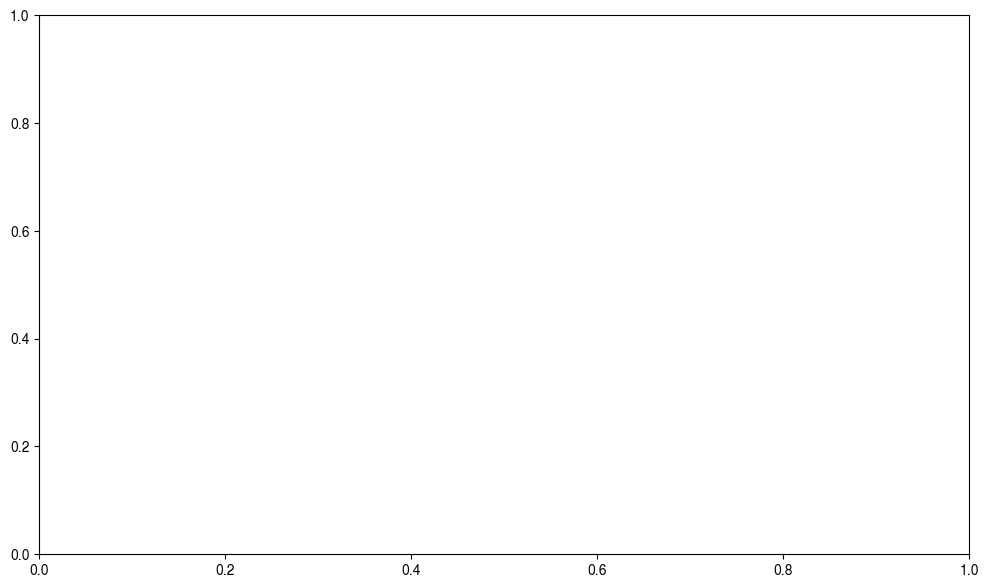

In [86]:
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Ellipse
fig_movie, ax_movie = plt.subplots(figsize=(12,7))  
import os 

import glob
ids = np.loadtxt('/media/janne/Transcend/bacteria/apoptotic_cells/apoptotic_cells_bact_id.dat')
apop_pos = dict(A= [15.67,40.073], B=[9.537,25.23], C=[45.254,37.856])
time = np.loadtxt('/media/janne/Transcend/bacteria/apoptotic_cells/time_x_y/time_x_y_id_1626.dat',usecols=0)

file_list = glob.glob('/media/janne/Transcend/bacteria/apoptotic_cells/time_x_y/*.dat')
file_list = sorted(file_list, key=lambda x: int(x.split('_id_')[-1].split('.')[0]))

In [ ]:
data = [np.loadtxt(file)[:,2] for file in file_list]
x=[np.loadtxt(file)[:,1] for file in file_list]

data_copy = data
x_copy = x
pairs = [(list(), list()) for _ in range(len(file_list))]
x1, y1 = zip(*pairs)
scale=1.5
w=4.5*scale
h=10*scale

cellA = Ellipse((apop_pos['A'][0],apop_pos['A'][1]),width=w,height=h,color='r' ,fill=False)
cellB = Ellipse((apop_pos['B'][0],apop_pos['B'][1]),width=w,height=h,color='r',fill=False)
cellC = Ellipse((apop_pos['C'][0],apop_pos['C'][1]), width=w,height=h,color='r',fill=False)



def animate(i):
    frame_index = i
    
    ax_movie.clear()
    output_folder = f'/media/janne/Transcend/bacteria/apoptotic_cells/movies/frames_animation_apopcells'
  
    os.makedirs(output_folder, exist_ok=True)


    for r in range(len(data)):

        if frame_index < len(x[r]):
            x1[r].append(x[r][frame_index])
            y1[r].append(data[r][frame_index])
     
        

        ax_movie.plot(x1[r],y1[r],marker='o', ms=5, mfc='none', lw=1.3,mew=1.2)
        ax_movie.annotate(f'id {int(ids[r])}',xy=(x1[r][-1],y1[r][-1]))


    ax_movie.annotate('A',xy=apop_pos['A'],c='blue',weight='bold',size=15,ha='center')
    ax_movie.annotate('B',xy=apop_pos['B'],c='blue',weight='bold',size=15,ha='center')
    ax_movie.annotate('C',xy=apop_pos['C'],c='blue',weight='bold',size=15,ha='center')
    ax_movie.add_artist(cellA)
    ax_movie.add_patch(cellB)
    ax_movie.add_patch(cellC)
    ax_movie.set_title(f'{time[frame_index]} s')
    ax_movie.set_xlabel(r'x ($\mu$m)',fontsize=18)
    ax_movie.set_ylabel(r'y ($\mu$m)',fontsize=18)

    ax_movie.tick_params(axis='both', labelsize=15)

    


    frame_filename = f'/media/janne/Transcend/bacteria/apoptotic_cells/movies/frames_animation_apopcells/frame_{frame_index:03d}'
    plt.savefig(frame_filename, dpi=300)
    

ani = FuncAnimation(fig_movie,animate, frames=149, interval=40, repeat=False)
plt.show()

## Compute distance to nearest apoptotic cell



In [40]:
for id in ids:
    id = int(id)
    file_xy = np.loadtxt(f'/media/janne/Transcend/bacteria/apoptotic_cells/time_x_y/time_x_y_id_{id}.dat') #time x y 
    file_name_min = f'/media/janne/Transcend/bacteria/apoptotic_cells/distance_nearest_apop_cell/id_{id}_to_nearest_time_cell_dist.dat'
    time = file_xy[:,0]
    x = file_xy[:,1]
    y = file_xy[:,2]
    for t in range(len(time)):
        
        dist_to_A = np.sqrt((apop_pos['A'][0] - x[t])**2 + (apop_pos['A'][1] - y[t])**2)
        dist_to_B = np.sqrt((apop_pos['B'][0] - x[t])**2 + (apop_pos['B'][1] - y[t])**2)
        dist_to_C = np.sqrt((apop_pos['C'][0] - x[t])**2 + (apop_pos['C'][1] - y[t])**2)
        min_dist_to_apoptotic = min(dist_to_A,dist_to_B,dist_to_C)

        with open(file_name_min, 'a') as kk:
            if min_dist_to_apoptotic == dist_to_A:
                kk.write(f'{time[t]} A {min_dist_to_apoptotic:.3f}\n')
            if min_dist_to_apoptotic == dist_to_B:
                kk.write(f'{time[t]} B {min_dist_to_apoptotic:.3f}\n')
            if min_dist_to_apoptotic == dist_to_C:
                kk.write(f'{time[t]} C {min_dist_to_apoptotic:.3f}\n')   

In [ ]:
%matplotlib inline
import statsmodels.api as sm
def plot_dist_and_deriv(id):

    """
    This function plots and calculates the derivative of the mininmum distance to an apoptotic cell with smoothed and non smoothed versions.
    id = track id (float or int)
    """

    
    id = int(id)
    file_name_min = f'/media/janne/Transcend/bacteria/apoptotic_cells/distance_nearest_apop_cell/id_{id}_to_nearest_time_cell_dist.dat'
    file_name_min_deriv = f'/media/janne/Transcend/bacteria/apoptotic_cells/distance_nearest_apop_cell/deriv_id_{id}_to_nearest_time_cell_dist.dat'
    file_min = np.loadtxt(file_name_min,usecols=(0,2))
    time = file_min[:,0]
  
    dist = file_min[:,1]
    lowess = sm.nonparametric.lowess
    
    deriv = np.diff(dist)/np.diff(time)
    np.savetxt(file_name_min_deriv, np.c_[time[:-1],deriv],fmt='%.3f')
    d = lowess(deriv,time[:-1],frac=0.1,it=5, return_sorted=True)
    traj= lowess(dist,time,frac=0.09,it=1, return_sorted=True)
    deriv_from_smoothed = np.diff(traj[:,1])/np.diff(time)

    file_name_min_deriv_smoothed = f'/media/janne/Transcend/bacteria/apoptotic_cells/distance_nearest_apop_cell/deriv_smoothed_id_{id}_to_nearest_time_cell_dist.dat'
    np.savetxt(file_name_min_deriv_smoothed, np.c_[time[:-1],deriv_from_smoothed],fmt='%.3f')
    
    scale=1.16
    sizex=7.8*scale
    sizey=4.5*scale
    fig,(ax,ax2) = plt.subplots(1,2,figsize=(sizex,sizey))

    ax.plot(time, dist, lw=1,ms=2, marker='o',label='raw')
    ax.plot(time, traj[:,1],lw=1.5,label='smoothed')
    ax.set_xlabel('time')
    ax.set_ylabel(r'$l_{min}$ $(\mu m)$',fontsize=14)
    ax.set_title(f'distance to nearest apoptotic cell, id = {id}')
    
    ax2.plot(time[:-1],deriv,lw=0.7,ms=2, marker='o',label='raw')
    # ax2.plot(time[:-1],d[:,1],lw=2,label='smoothed')
    ax2.plot(time[:-1],deriv_from_smoothed, lw=2,label=r'derivative of smoothed $l_{min}$')
    ax2.hlines(0,xmin=min(time[:-1]),xmax=max(time[:-1]),linestyles='--',color='black',lw=1.7)
    ax2.set_xlabel('time')
    ax2.set_ylabel(r'$dl_{min}/dt$ $(\mu m/s)$',fontsize=14)
    ax2.set_title(rf'derivative of the distance to nearest apoptotic cell, id = {id}')
    ax2.legend()
    ax.legend()
    plt.tight_layout()

    average_m = np.average(deriv_from_smoothed)
    name_file_average_m = '/media/janne/Transcend/bacteria/apoptotic_cells/distance_nearest_apop_cell/average_m_distribution.dat'
    
    with open(name_file_average_m, 'a') as kk:
        kk.write(f'{average_m:.4f}\n')

    print(max(deriv_from_smoothed), min(deriv_from_smoothed))

    # plt.savefig(f'/media/janne/Transcend/bacteria/apoptotic_cells/distance_nearest_apop_cell/image_id_{id}.pdf',dpi=250)
    return plt.close()

for id in ids:
    print(f'id = {int(id)}\n')
    plot_dist_and_deriv(id)
    print('-------------')

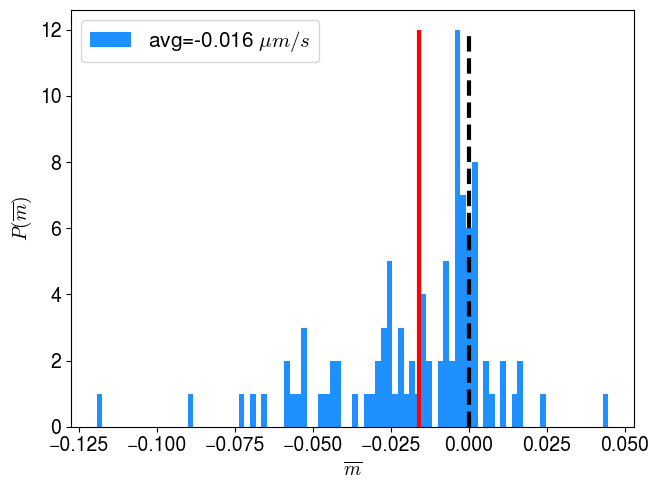

In [6]:
average_m_dist = np.loadtxt('/media/janne/Transcend/bacteria/apoptotic_cells/distance_nearest_apop_cell/average_m_distribution.dat')
hist_plot(average_m_dist, r'$\overline{m}$', bins=90,units=r' $\mu m/s$', y=r'$P(\overline{m})$',path_name_to_save='/media/janne/Transcend/bacteria/apoptotic_cells/distance_nearest_apop_cell/average_m_distribution.pdf')

In [178]:
import random


def samples_for_pvalue(nbr_samples):
  
    step=0
    samples = []
    
    while step <= nbr_samples:
        nbr = random.random()
        if nbr >= 0.5:
            sample = random.choice(pos_values)
        else:
            sample = random.choice(neg_vales)
        samples.append(sample)
        step+=1
    return samples,np.average(samples) 

n = 20000
dist_samples = np.zeros(n)
step1=0
while step1 < n:
    a = samples_for_pvalue(100)
    dist_samples[step1] = a[1]
    step1+=1

In [179]:
def gaussian(bins,sigma,mu):
    return 1/(sigma* np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) )

In [204]:
rest = np.array([a for a in dist_samples if a < np.average(average_m_dist)])

In [205]:
all_pos = np.where(dist_samples < np.average(average_m_dist))
imin=all_pos[0][0]
imax=all_pos[0][-1]


179

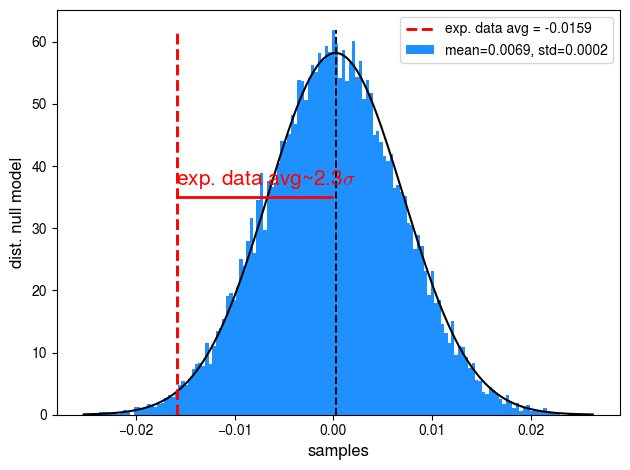

In [183]:

fig,ax_hist = plt.subplots()

sigma,mu = np.std(dist_samples), np.mean(dist_samples)
bins=150
data_2,bins_2=np.histogram(dist_samples,bins=bins,density=True)
binscenters_2=0.5*(bins_2[1:]+bins_2[:-1])

ax_hist.bar(bins_2[:-1],data_2,width=bins_2[1]-bins_2[0],color='dodgerblue' ,label=f'mean={sigma:.4f}, std={mu:.4f}',linewidth=12)
ax_hist.vlines(np.average(dist_samples),ymin=0,ymax=max(data_2),ls='--',color='black',lw=1.4)
ax_hist.plot(bins_2[:-1],gaussian(bins_2[:-1],sigma,mu), color='black')
ax_hist.vlines(np.average(average_m_dist),ymin=0,ymax=62,color='red',lw=2.1,ls = '--',label=f'exp. data avg = {np.average(average_m_dist):.4f}')
ax_hist.legend()
ax_hist.annotate(rf"exp. data avg~{abs(np.average(average_m_dist))/sigma:.1f}$\sigma$",xy=(np.average(average_m_dist)*0.5-0.008,37),color='red',fontsize=15)
ax_hist.hlines(35,xmin=np.average(average_m_dist),xmax=0, lw=2,color='red',)
ax_hist.set_ylabel('dist. null model',fontsize=12)
ax_hist.set_xlabel('samples',fontsize=12)
plt.tight_layout()
plt.show()

In [154]:
abs(np.average(average_m_dist))/sigma

2.3173414772976524